(128, 128)
(128, 128)
(2549026+0j)
(-18307.183169957636-3531.6769775327684j)


C:\Users\12998\AppData\Local\Temp\ipykernel_3160\3964284886.py:33: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered_shifted = 20 * np.log(np.abs(fshift_filtered))


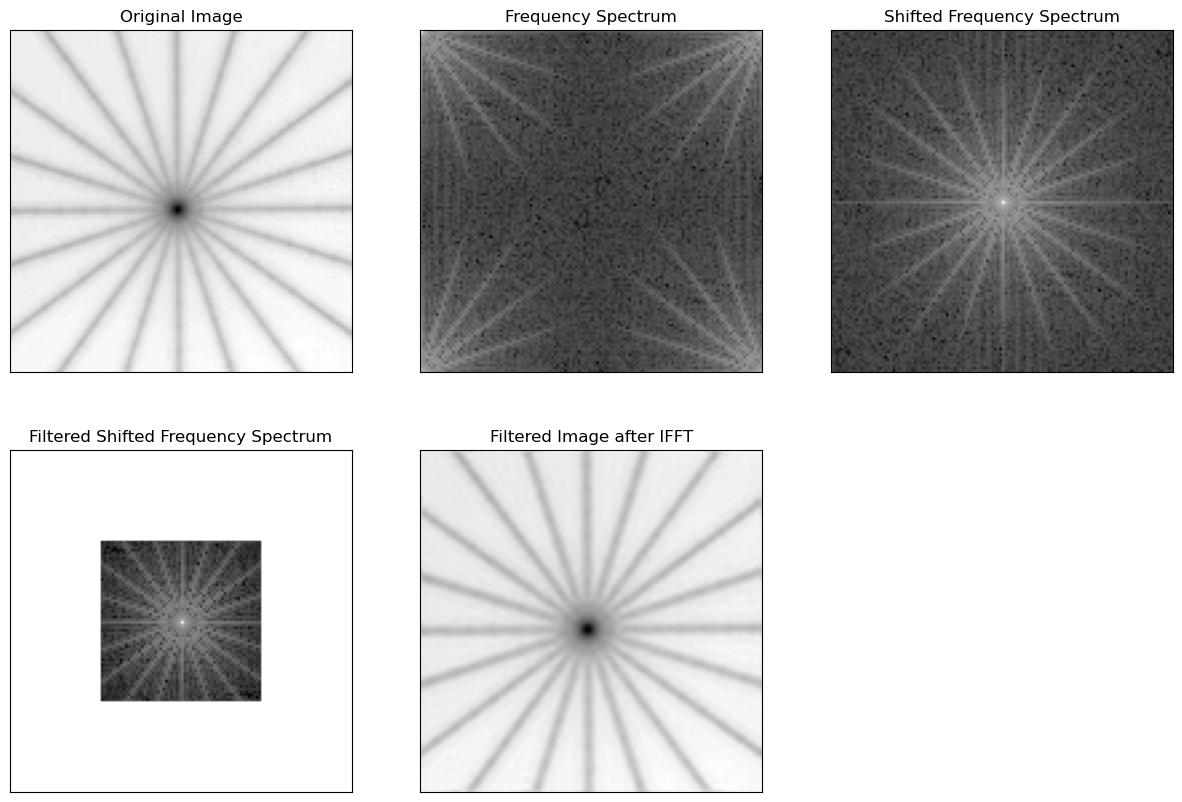

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 读取图像并转换为灰度图
image = cv2.imread('../data/star.png', 0)
print(image.shape)
# 进行二维离散傅里叶变换
f = np.fft.fft2(image)
print(f.shape)
print(f.max())
print(f.min())
# 计算频谱的幅度谱（频率图）
magnitude_spectrum = 20 * np.log(np.abs(f))

# 将零频率分量移到频谱中心
fshift = np.fft.fftshift(f)

# 计算中心偏移后的频谱幅度谱
magnitude_spectrum_shifted = 20 * np.log(np.abs(fshift))

# 创建低通滤波器
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30
mask = np.zeros((rows, cols), np.uint8)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 1

# 应用滤波器到中心偏移后的频谱
fshift_filtered = fshift * mask

# 计算滤波后中心偏移频谱的幅度谱
magnitude_spectrum_filtered_shifted = 20 * np.log(np.abs(fshift_filtered))

# 进行逆中心偏移
f_ishift = np.fft.ifftshift(fshift_filtered)

# 进行逆二维离散傅里叶变换
image_back = np.fft.ifft2(f_ishift)

# 取实部（因为逆变换结果可能存在极微小的虚部，是计算误差导致）
image_back = np.abs(image_back)

# 显示结果
plt.figure(figsize=(15, 10))

plt.subplot(231), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(magnitude_spectrum_shifted, cmap='gray')
plt.title('Shifted Frequency Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(magnitude_spectrum_filtered_shifted, cmap='gray')
plt.title('Filtered Shifted Frequency Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(image_back, cmap='gray')
plt.title('Filtered Image after IFFT'), plt.xticks([]), plt.yticks([])

plt.show()